<a href="https://colab.research.google.com/github/sukeshshenoyy/MACHINE_LEARNING_LAB/blob/main/Lab_program_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

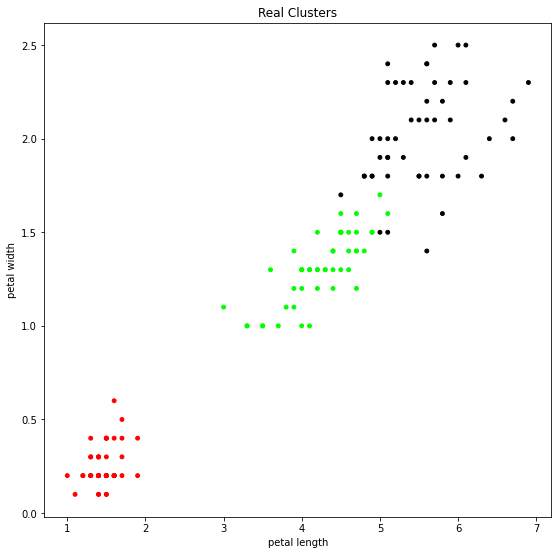

In [ ]:
plt.figure(figsize=(20,20))
colormap = np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(X.petal_length,X.petal_width, c=colormap[y.Targets],s = 15)
plt.title('Real Clusters')
plt.xlabel('petal length')
plt.ylabel('petal width')
model = KMeans(n_clusters = 3)
model.fit(X)

Text(0, 0.5, 'petal width')

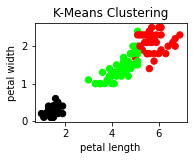

In [ ]:
plt.subplot(2,2,2)
plt.scatter(X.petal_length,X.petal_width,c = colormap[model.labels_],s=40)
plt.title('K-Means Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0, 0.5, 'petal width')

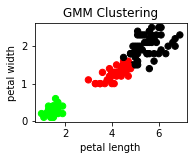

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa,columns=X.columns)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(X.petal_length,X.petal_width,c=colormap[gmm_y],s=40)
plt.title('GMM Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [ ]:
print('Accuracy of K-Means Clustering ')
print(sm.accuracy_score(y, model.labels_))

sm.confusion_matrix(y, model.labels_)

Accuracy of K-Means Clustering 
0.32


array([[ 0,  0, 50],
       [ 2, 48,  0],
       [36, 14,  0]])